# __Feature Engineering__

## __Agenda__

- Introduction to Feature Engineering
- Feature Engineering Methods
- Transforming Variables
  * Log Transformation
  * Square Root Transformation
  * Box-Cox Transformation
- Features Scaling
- Label Encoding
- One Hot Encoding
- Hashing
    * Hashlib Module
- Grouping Operations

## __1. Introduction to Feature Engineering__
It refers to the process of selecting, modifying, or creating new features (variables) from the raw data to improve the performance of machine learning models.
- It involves transforming the data into a more suitable format, making it easier for models to learn patterns and make accurate predictions.
- It is a critical step in the data preprocessing pipeline and plays a key role in the success of machine learning projects.



## __2. Feature Engineering Methods__

They introduce the concept of creating new features through mathematical operations, transformations, or combining existing variables.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_10_Feature_Engineering/Feature_Engineering_Methods.png)

__Note:__ The __Data Wrangling__ lesson extensively addresses various feature engineering methods, including outlier handling, imputation, and data cleaning. Any aspects not covered in that lesson but deemed essential for feature engineering are comprehensively discussed here.

In [30]:
import pandas as pd
import numpy as np
df= pd.read_csv("HousePrices.csv")
# Example: Creating a new feature 'total_rooms' by adding bedrooms and bathrooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

## __3. Transforming Variables__
Transforming variables is a crucial aspect of feature engineering that involves modifying the scale, distribution, or nature of variables to meet certain assumptions or to make them more suitable for analysis or modeling.
- Here are a few common techniques for transforming variables:
1. Log transformation
2. Square root transformation
3. Box-cox transformation


### __3.1 Log Transformation__

Log transformation is useful for handling skewed data or reducing the impact of outliers. It applies the natural logarithm to the variable values and makes highly skewed distributions less skewed.

In [31]:
# Logarithmic transformation of the 'price' column
df['log_price'] = np.log(df['price'])

c:\Users\faizh\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### __3.2 Square Root Transformation__
Square root transformation, like log transformation, effectively stabilizes variance and addresses skewed distributions. Although it's gentler than log transformation, it achieves the same objective.

In [32]:
# Square root transforming the 'price' variable
df['SquareRoot_price'] = np.sqrt(df['price'])

# Displaying the DataFrame with the new feature
print("DataFrame with square root transformed 'price':")
print(df[['price', 'SquareRoot_price']])

DataFrame with square root transformed 'price':
             price  SquareRoot_price
0     3.130000e+05        559.464029
1     2.384000e+06       1544.020725
2     3.420000e+05        584.807661
3     4.200000e+05        648.074070
4     5.500000e+05        741.619849
...            ...               ...
4595  3.081667e+05        555.127613
4596  5.343333e+05        730.981076
4597  4.169042e+05        645.681165
4598  2.034000e+05        450.998891
4599  2.206000e+05        469.680743

[4600 rows x 2 columns]


### __3.3 Box-Cox Transformation__

The box-cox transformation is a family of power transformations that includes log and square root transformations.
- It can handle a broader range of data distributions.

- Ensuring positive data is crucial for the Box-Cox transformation because it involves taking the logarithm, which is undefined for zero or negative values. Adding a constant helps avoid mathematical errors and ensures the transformation can be applied effectively.

In [33]:
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'sales' variable
df['BoxCox_Price'], _ = boxcox(df['sqft_living'])

# Displaying the DataFrame with the Box-Cox transformed 'sales' variable
print("DataFrame with box-cox transformed price:")
print(df[['sqft_living', 'BoxCox_Price']])

DataFrame with box-cox transformed price:
      sqft_living  BoxCox_Price
0            1340      8.270694
1            3650      9.609815
2            1930      8.752432
3            2000      8.799829
4            1940      8.759303
...           ...           ...
4595         1510      8.427671
4596         1460      8.383344
4597         3010      9.348240
4598         2090      8.858475
4599         1490      8.410112

[4600 rows x 2 columns]


## __4. Feature Scaling__
Feature scaling is a technique used in machine learning and data preprocessing to standardize or normalize the range of independent variables or features of a dataset.

- Min-max scaling transforms data to a specific range, typically between 0 and 1, preserving the relative differences between values. This normalization technique is ideal for datasets with known bounds, ensuring that all values are rescaled proportionally to fit within the specified range.

- Standard scaling is preferable for normally distributed data to maintain mean-centeredness and consistent standard deviations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_10_Feature_Engineering/Label_Encoding.png)

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
df[['sqft_living', 'sqft_lot']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot']])
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50     0.073652   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50     0.249051   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00     0.118451   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25     0.123766   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50     0.119210   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75     0.086560   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50     0.082764   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50     0.200456   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00     0.130600   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50     0.085042   

      sqft_lot  floors  waterfront  view  condition  ...  yr_built  \
0    

## __5. Label Encoding__

Label encoding is a technique used to convert categorical labels into a numeric format, making it suitable for machine learning algorithms that require numerical input.
- In label encoding, each unique category is assigned an integer value.
- This is particularly useful when dealing with ordinal categorical data, where the order of categories matters.

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {'size': ['small', 'medium', 'large', 'medium', 'small']}
df1 = pd.DataFrame(data)

# Before label encoding
print("Original DataFrame:")
print(df1)

# Apply label encoding
label_encoder = LabelEncoder()
df1['size_encoded'] = label_encoder.fit_transform(df1['size'])

# After label encoding
print("\nDataFrame after label encoding:")
print(df1)

Original DataFrame:
     size
0   small
1  medium
2   large
3  medium
4   small

DataFrame after label encoding:
     size  size_encoded
0   small             2
1  medium             1
2   large             0
3  medium             1
4   small             2


In [42]:
# Demonstrating label encoding using csv file
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'city' column
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50     0.073652   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50     0.249051   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00     0.118451   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25     0.123766   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50     0.119210   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75     0.086560   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50     0.082764   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50     0.200456   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00     0.130600   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50     0.085042   

      sqft_lot  floors  waterfront  view  condition  ...  yr_renovated  \
0

## __6. One-Hot Encoding__

One-hot encoding is a technique to represent categorical variables as binary vectors.
- It is particularly useful when dealing with nominal categorical data, where there is no inherent order among categories.
- In one-hot encoding, each unique category is transformed into a binary column, and only one column in each set of binary columns is _hot_ (or 1) to indicate the presence of that category.

- It increases dataset dimensionality, facilitating categorical data representation. However, it can lead to increased complexity and computational overhead.

In [43]:
import pandas as pd

# Sample DataFrame
data = {'color': ['red', 'blue', 'green', 'red', 'green']}
df2 = pd.DataFrame(data)

# Before one-hot encoding
print("Original DataFrame:")
print(df2)

# Apply one-hot encoding
df2_encoded = pd.get_dummies(df2, columns=['color'], prefix='color')

# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
print(df2_encoded)

Original DataFrame:
   color
0    red
1   blue
2  green
3    red
4  green

DataFrame after one-hot encoding:
   color_blue  color_green  color_red
0       False        False       True
1        True        False      False
2       False         True      False
3       False        False       True
4       False         True      False


In [44]:
# Demonstrating one-hot encoding using csv file
# One-Hot Encoding for the 'view' column
df_encode = pd.get_dummies(df, columns=['price'], prefix='price')

# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
print(df_encode)


DataFrame after one-hot encoding:
                     date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     2014-05-02 00:00:00       3.0       1.50     0.073652  0.006775     1.5   
1     2014-05-02 00:00:00       5.0       2.50     0.249051  0.007835     2.0   
2     2014-05-02 00:00:00       3.0       2.00     0.118451  0.010534     1.0   
3     2014-05-02 00:00:00       3.0       2.25     0.123766  0.006885     1.0   
4     2014-05-02 00:00:00       4.0       2.50     0.119210  0.009186     1.0   
...                   ...       ...        ...          ...       ...     ...   
4595  2014-07-09 00:00:00       3.0       1.75     0.086560  0.005330     1.0   
4596  2014-07-09 00:00:00       3.0       2.50     0.082764  0.006460     2.0   
4597  2014-07-09 00:00:00       3.0       2.50     0.200456  0.005939     2.0   
4598  2014-07-10 00:00:00       4.0       2.00     0.130600  0.005581     1.0   
4599  2014-07-10 00:00:00       3.0       2.50     0.085042  0.006952     

## __7. Hashing__

It is a technique to convert input data (of variable length) into a fixed-length string of characters, typically a hash code.
- The hash function takes an input (or message) and returns a fixed-size string of characters, which is typically a hexadecimal number.
- It is commonly used for indexing data structures, checking data integrity, and hashing passwords.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Updated_Images/Lesson_10/10_01/Lesson_10_Feature_EngineeringHashing.jpg)

In [45]:
# Example of hashing in Python
data = "Hello, Hashing!"

# Using the hash() function
hash_value = hash(data)

print(f"Original data: {data}")
print(f"Hash value: {hash_value}")

Original data: Hello, Hashing!
Hash value: 2843850205398043130


In [46]:
# Demonstrating hashing using csv file
# Hashing for the 'street' column
df['street_hashed'] = df['street'].apply(hash)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,total_rooms,log_price,SquareRoot_price,BoxCox_Price,city_encoded,street_hashed
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,0.073652,0.006775,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,4.50,12.653958,559.464029,8.270694,36,1405342498069353986
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,0.249051,0.007835,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,7.50,14.684290,1544.020725,9.609815,35,7277149427030200825
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,0.118451,0.010534,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.00,12.742566,584.807661,8.752432,18,-3414748095272398425
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,0.123766,0.006885,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,5.25,12.948010,648.074070,8.799829,3,699829414582080499
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,0.119210,0.009186,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,6.50,13.217674,741.619849,8.759303,31,-1300650195434548737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,0.086560,0.005330,1.0,0,0,4,...,501 N 143rd St,Seattle,WA 98133,USA,4.75,12.638396,555.127613,8.427671,35,7702841372001503542
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,0.082764,0.006460,2.0,0,0,3,...,14855 SE 10th Pl,Bellevue,WA 98007,USA,5.50,13.188775,730.981076,8.383344,3,3505165682917365034
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,0.200456,0.005939,2.0,0,0,3,...,759 Ilwaco Pl NE,Renton,WA 98059,USA,5.50,12.940612,645.681165,9.348240,32,6730835722049299784
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,0.130600,0.005581,1.0,0,0,3,...,5148 S Creston St,Seattle,WA 98178,USA,6.00,12.222930,450.998891,8.858475,35,-6708903537827919215


### __7.1 Hashlib Module__

The hashlib module in Python is used for generating hash values. It offers interfaces to different cryptographic hash algorithms like MD5, SHA-1, SHA-256, SHA-384, and SHA-512.

- It enables the efficient use of hash functions, ensuring secure computations.
- It provides reliability for hash-related operations.
- It is widey used for cryptographic operations, data integrity, and password hashing.
- It ensures convenience and robustness.



Cryptographic hash algorithms vary in hash size and security levels.

- For tasks where security is not a critical concern, you can opt for MD5 or SHA-1. However, it's important to note that both algorithms are deprecated due to vulnerabilities.

- For security-sensitive applications, it's advisable to prioritize SHA-256, SHA-384, or SHA-512 due to their stronger security and larger hash sizes.

In [47]:
# Example of hashlib module in Python
import hashlib

# Input data
data = b'Hello, world!'
print(f"Original data: {data.decode()} \n")

# Calculate MD5 hash
md5_hash = hashlib.md5(data).hexdigest()
print("MD5 Hash:", md5_hash)

# Calculate SHA-1 hash
sha1_hash = hashlib.sha1(data).hexdigest()
print("SHA-1 Hash:", sha1_hash)

# Calculate SHA-256 hash
sha256_hash = hashlib.sha256(data).hexdigest()
print("SHA-256 Hash:", sha256_hash)

# Calculate SHA-384 hash
sha384_hash = hashlib.sha384(data).hexdigest()
print("SHA-384 Hash:", sha384_hash)

# Calculate SHA-512 hash
sha512_hash = hashlib.sha512(data).hexdigest()
print("SHA-512 Hash:", sha512_hash)


Original data: Hello, world! 

MD5 Hash: 6cd3556deb0da54bca060b4c39479839
SHA-1 Hash: 943a702d06f34599aee1f8da8ef9f7296031d699
SHA-256 Hash: 315f5bdb76d078c43b8ac0064e4a0164612b1fce77c869345bfc94c75894edd3
SHA-384 Hash: 55bc556b0d2fe0fce582ba5fe07baafff035653638c7ac0d5494c2a64c0bea1cc57331c7c12a45cdbca7f4c34a089eeb
SHA-512 Hash: c1527cd893c124773d811911970c8fe6e857d6df5dc9226bd8a160614c0cd963a4ddea2b94bb7d36021ef9d865d5cea294a82dd49a0bb269f51f6e7a57f79421


In this example, the `hashlib` module is imported and input data is provided in bytes format. Hash values are then computed using the md5(), sha1(), sha256(), sha384(), and sha512() functions, and their hexadecimal representations are obtained using hexdigest().

In [48]:
# Demonstrating MD5 hash function using csv file for the 'street' column

street_column = df['street']
hashed_streets = street_column.apply(lambda x: hashlib.md5(x.encode()).hexdigest())

# Replace the original street values with hash values
df['hashed_street'] = hashed_streets

# Optionally, write the updated DataFrame back to a CSV file
df.to_csv('hashed_file.csv', index=False)

df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city,statezip,country,total_rooms,log_price,SquareRoot_price,BoxCox_Price,city_encoded,street_hashed,hashed_street
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,0.073652,0.006775,1.5,0,0,3,...,Shoreline,WA 98133,USA,4.50,12.653958,559.464029,8.270694,36,1405342498069353986,6dfce6ba342c1453d53f4fbad459190f
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,0.249051,0.007835,2.0,0,4,5,...,Seattle,WA 98119,USA,7.50,14.684290,1544.020725,9.609815,35,7277149427030200825,eca9bb465b9b6f538c3c8354f463a914
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,0.118451,0.010534,1.0,0,0,4,...,Kent,WA 98042,USA,5.00,12.742566,584.807661,8.752432,18,-3414748095272398425,f28aaaaf79810e27de8be497f141e983
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,0.123766,0.006885,1.0,0,0,4,...,Bellevue,WA 98008,USA,5.25,12.948010,648.074070,8.799829,3,699829414582080499,57b51c9b4274c3310f4bb6ee86e238fa
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,0.119210,0.009186,1.0,0,0,4,...,Redmond,WA 98052,USA,6.50,13.217674,741.619849,8.759303,31,-1300650195434548737,0f4f6aaeea3eca19264763a7b472d25c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,0.086560,0.005330,1.0,0,0,4,...,Seattle,WA 98133,USA,4.75,12.638396,555.127613,8.427671,35,7702841372001503542,379a041108472c400b0bf6b7d74a8a7d
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,0.082764,0.006460,2.0,0,0,3,...,Bellevue,WA 98007,USA,5.50,13.188775,730.981076,8.383344,3,3505165682917365034,0ea89e25733395d9b2b939faac4177e7
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,0.200456,0.005939,2.0,0,0,3,...,Renton,WA 98059,USA,5.50,12.940612,645.681165,9.348240,32,6730835722049299784,1eb91d567557f6eeba1710631b73dc3c
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,0.130600,0.005581,1.0,0,0,3,...,Seattle,WA 98178,USA,6.00,12.222930,450.998891,8.858475,35,-6708903537827919215,72a210cd0de2505e5b5b40b6897fe46e


## __8. Grouping Operations__

Grouping operations involve splitting a dataset into groups based on some criteria, applying a function to each group independently, and then combining the results.
- This is a crucial step in data analysis and manipulation, allowing for insights into the data at a more granular level.
- Grouping operations are commonly combined with aggregate functions to summarize data within each group.

In [49]:
import pandas as pd

# Sample DataFrame
data = {'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
        'Revenue': [500, 300, 700, 400, 600]}

df3 = pd.DataFrame(data)

# Grouping by 'Category' and calculating total revenue for each category
grouped_df3 = df3.groupby('Category')['Revenue'].sum().reset_index()

print("Original DataFrame:")
print(df3)
print("\nGrouped DataFrame with total revenue:")
print(grouped_df3)

Original DataFrame:
      Category  Revenue
0  Electronics      500
1     Clothing      300
2  Electronics      700
3     Clothing      400
4  Electronics      600

Grouped DataFrame with total revenue:
      Category  Revenue
0     Clothing      700
1  Electronics     1800


In [50]:
# Grouping by 'city' and calculating the average price
df_grouped = df.groupby('city')['price'].mean().reset_index()
print(df_grouped)

                   city         price
0                Algona  2.072880e+05
1                Auburn  2.993404e+05
2    Beaux Arts Village  7.450000e+05
3              Bellevue  8.471807e+05
4         Black Diamond  3.396056e+05
5               Bothell  4.814419e+05
6                Burien  3.489472e+05
7             Carnation  5.087520e+05
8            Clyde Hill  1.321945e+06
9             Covington  2.962304e+05
10           Des Moines  3.049925e+05
11               Duvall  4.039941e+05
12             Enumclaw  3.076146e+05
13            Fall City  6.926818e+05
14          Federal Way  2.898877e+05
15  Inglewood-Finn Hill  4.250000e+05
16             Issaquah  5.961637e+05
17              Kenmore  4.474940e+05
18                 Kent  4.394924e+05
19             Kirkland  6.515836e+05
20     Lake Forest Park  4.484750e+05
21         Maple Valley  3.364749e+05
22               Medina  2.046559e+06
23        Mercer Island  1.123818e+06
24               Milton  2.850000e+05
25          

In [51]:
# Grouping by 'city' and calculating the maximum price
df_max_price = df.groupby('city')['price'].max().reset_index()
print(df_max_price)

                   city       price
0                Algona    262000.0
1                Auburn    900000.0
2    Beaux Arts Village    745000.0
3              Bellevue   7062500.0
4         Black Diamond    650000.0
5               Bothell    749995.0
6                Burien   1035000.0
7             Carnation   1680000.0
8            Clyde Hill   3800000.0
9             Covington   2199900.0
10           Des Moines    950000.0
11               Duvall    955000.0
12             Enumclaw    687000.0
13            Fall City   1600000.0
14          Federal Way    819000.0
15  Inglewood-Finn Hill    425000.0
16             Issaquah   2238888.0
17              Kenmore   1120000.0
18                 Kent  26590000.0
19             Kirkland   3000000.0
20     Lake Forest Park    790000.0
21         Maple Valley    725000.0
22               Medina   3710000.0
23        Mercer Island   4668000.0
24               Milton    320000.0
25            Newcastle   1200000.0
26        Normandy Park   13

In [52]:
# Grouping by 'city' and calculating the minimum price
df_min_price = df.groupby('city')['price'].min().reset_index()
print(df_min_price)

                   city          price
0                Algona  100000.000000
1                Auburn       0.000000
2    Beaux Arts Village  745000.000000
3              Bellevue       0.000000
4         Black Diamond       0.000000
5               Bothell  347000.000000
6                Burien       0.000000
7             Carnation   80000.000000
8            Clyde Hill       0.000000
9             Covington       0.000000
10           Des Moines  140000.000000
11               Duvall  117833.333333
12             Enumclaw       0.000000
13            Fall City  275000.000000
14          Federal Way       0.000000
15  Inglewood-Finn Hill  425000.000000
16             Issaquah       0.000000
17              Kenmore       0.000000
18                 Kent       0.000000
19             Kirkland   90000.000000
20     Lake Forest Park       0.000000
21         Maple Valley       0.000000
22               Medina  188000.000000
23        Mercer Island       0.000000
24               Milton  

# __Assisted Practice__

## __Problem Statement:__
A botanical research team is conducting a comprehensive analysis of iris flowers, aiming to derive valuable insights from their characteristics. The team wants to explore feature engineering techniques to understand and visualize the relationships within the Iris dataset.

## __Steps to perform:__
- Understand the Dataset: Get familiar with the Iris dataset and its features
- Engineer Features: Create new features like the sepal and petal areas
- Transform Variables: If the features are not normally distributed, apply transformations
- Scale Features: Use Min-max scaling or standard scaling to scale the features
- Encode Labels: Convert the categorical data (species) into numerical data using label encoding
- One Hot Encoding: Apply one-hot encoding to the species feature and compare it with label encoding

## **Step 1 — Understand the Dataset**
🎯 Goal

Become familiar with:
*  Feature names
*  Feature types
*  Target variable (species)


In [53]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
df['species'] = iris.target

df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Key observation:**

*  All measurements are numeric
*  Species is categorical
*  No missing values (important for later steps)



---

**💡 Why This Matters**

Feature engineering decisions depend entirely on:
*  Data types
*  Distributions
*  Domain meaning

You always inspect before transforming.



## **Step 2 — Engineer New Features (Sepal & Petal Area)**
**🎯 Goal**


Create more meaningful features by combining existing ones.


In [54]:
# Create engineered features
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

df[['sepal_area', 'petal_area']].head()

,sepal_area,petal_area
0,17.85,0.28
1,14.70,0.28
2,15.04,0.26
3,14.26,0.30
4,18.00,0.28


**💡 Model Impact**
Engineered features often:
*  Capture non-linear relationships
*  Improve separability between classes
*  Reduce reliance on raw dimensions


---



## **Step 3 — Transform Variables (Handle Skew)**
**🎯 Goal**


Normalize skewed distributions to help models learn more effectively.


## **✅ Visual Inspection (Optional but Recommended)**

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['petal_area'], kde=True)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

## **✅ Apply Log Transformation**

<Axes: xlabel='log_petal_area', ylabel='Count'>

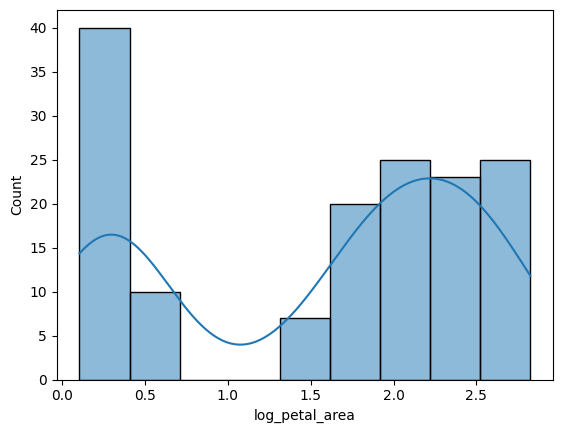

In [5]:
import numpy as np

df['log_petal_area'] = np.log(df['petal_area'] + 1)
sns.histplot(df['log_petal_area'], kde=True)

**💡 Framing**
Transformations are used to:
*  Stabilize variance
*  Improve normality
*  Improve model convergence


## **Step 4 — Scale Features**
**🎯 Goal**

Ensure all numeric features exist on comparable scales.


---


✅ Min-Max Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(
    df[['sepal_area', 'petal_area', 'log_petal_area']]
)

df_scaled = pd.DataFrame(
    scaled_features,
    columns=['sepal_area_scaled', 'petal_area_scaled', 'log_petal_area_scaled']
)

df_scaled.head()

,sepal_area_scaled,petal_area_scaled,log_petal_area_scaled
0,0.392108,0.010787,0.052367
1,0.234765,0.010787,0.052367
2,0.251748,0.009518,0.046580
3,0.212787,0.012056,0.058065
4,0.399600,0.010787,0.052367


## **✅ Standard Scaling (Alternative)**

In [7]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['petal_area_standardized'] = std_scaler.fit_transform(
    df[['petal_area']]
)

**💡 Key Distinction**
*  Min-Max Scaling: bounded [0,1]
*  Standard Scaling: mean = 0, std = 1

## **Step 5 — Encode Labels (Label Encoding)**
**🎯 Goal**

Convert categorical species labels into numeric form.


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['species_encoded'] = le.fit_transform(df['species'])
df[['species', 'species_encoded']].head()

,species,species_encoded
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**⚠️ Important Warning**

Label encoding should not be used on nominal input features, because it introduces artificial order.

## **Step 6 — One-Hot Encoding & Comparison**
**🎯 Goal**

Compare one-hot encoding with label encoding for categorical data.


---
**✅ One-Hot Encoding**



In [9]:
df_onehot = pd.get_dummies(df, columns=['species'], prefix='species')
df_onehot.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area,log_petal_area,petal_area_standardized,species_encoded,species_0,species_1,species_2
0,5.1,3.5,1.4,0.2,17.85,0.28,0.246860,-1.174041,0,True,False,False
1,4.9,3.0,1.4,0.2,14.70,0.28,0.246860,-1.174041,0,True,False,False
2,4.7,3.2,1.3,0.2,15.04,0.26,0.231112,-1.178299,0,True,False,False
3,4.6,3.1,1.5,0.2,14.26,0.30,0.262364,-1.169783,0,True,False,False
4,5.0,3.6,1.4,0.2,18.00,0.28,0.246860,-1.174041,0,True,False,False


**🔍 Comparison Summary**

| Encoding Type     | Pros              | Cons                   |
|-------------------|-------------------|------------------------|
| Label Encoding    | Simple, compact   | Implies order          |
| One-Hot Encoding  | No false order    | Increases dimensionality |

**💡 When to Use Each**

*  Label Encoding: target variables
*  One-Hot Encoding: nominal input features

**🧠 Key Takeaways**
*  Feature engineering reveals hidden structure
*  Transformations improve learnability
*  Scaling prevents dominance
*  Encoding choices affect model behavior
